In [30]:
# Module Import
from Functions import * 

import numpy as np
# modules for functions
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib import pyplot as plt
import seaborn as sns
pio.templates.default = "plotly_dark"

# Imports for tests
from scipy.stats import (kruskal, kstest, pearsonr, ranksums, shapiro,
                         spearmanr, ttest_ind, f_oneway)
from statsmodels.graphics.gofplots import qqplot

# Brief Intro

## Normality tests

Normality tests should be conducted for all series that are introduced to the tests to establish if the proper testing methods are parametric or non parametric. The first test is heuristic with visualizing the dataset with a QQ plot and the second one is a shapiro test. If either method indicates any series are not normally distributed then non parametric methods are selected.

## Parametric methods

### Pearson r correlation: 
The most widely used correlation statistic used to measure the degree of the relationship between two linearly related
variables.
Note: For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have
a bell-shaped curve).

### Two sample t-test: 
To test for differences between two groups of users
(e.g. males vs females). The t-test can be used to determine if the means of
two sets of data are significantly different from each other.

### One way analysis of variance (ANOVA) test: 
A technique that can be used to compare means of two or more samples. 
Typically, however, the oneway ANOVA is used to test for differences among at least three groups,
since the two-group case can be covered by a t-test.

## Non parametric methods

### Spearman rank correlation: 
A non-parametric test that is used to measure the degree of association between two variables.
Note: The Spearman rank correlation test (vs to Pearson) does not carry any
assumptions about the distribution of the data

### Wilcoxon-Mann-Whitney (WMW) rank sum test: 
Non parametric method to test
for differences between two groups of users (e.g. males vs females).

### Kruskal–Wallis test: 
Non parametric method for testing whether samples
originate from the same distribution. Kruskal-Wallis can accommodate more
than two groups, extending Wilcoxon-Mann-Whitney. The parametric equivalent
of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA).

# Examples

### Example workflow for difference in means

In [31]:
#import the Bounce Rate Datasets
xls1 = pd.ExcelFile('Data/Bounce_Rate_2018.xlsx')
xls2 = pd.ExcelFile('Data/Bounce_Rate_2019.xlsx')
Bounce_Rate_2018 = pd.read_excel(xls1, 'Dataset1')
Bounce_Rate_2019 = pd.read_excel(xls2, 'Dataset1')

c:\Users\dimta\Anaconda3\envs\Pycaret\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [32]:
#Remove the dates for ease
Bounce_Rate_2018=Bounce_Rate_2018['Bounce Rate']
Bounce_Rate_2019=Bounce_Rate_2019['Bounce Rate']

Descriptive Statistics:
count    91.000000
mean      0.475154
std       0.028132
min       0.415191
25%       0.458505
50%       0.476049
75%       0.495634
max       0.545142
Name: Bounce Rate, dtype: float64

Visual Normality Tests:

 Variable plots:

 Variable Histogram


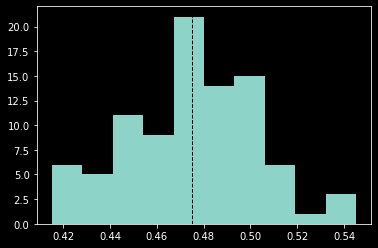

Boxplot


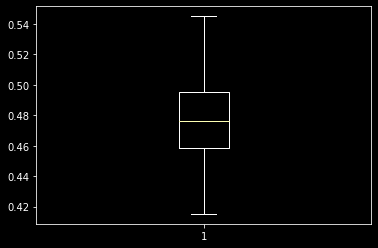

QQplot


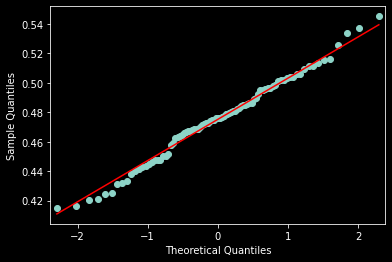

In [33]:
# Normality Test for 2018 Bounce Rate
normality_eda(Bounce_Rate_2018)

In [34]:
normality_test(Bounce_Rate_2018)


Shapiro Test Statistics=0.988, p=0.593
Variable 1 looks Gaussian (fail to reject H0)


Descriptive Statistics:
count    91.000000
mean      0.403083
std       0.039647
min       0.308508
25%       0.368709
50%       0.408397
75%       0.433654
max       0.486579
Name: Bounce Rate, dtype: float64

Visual Normality Tests:

 Variable plots:

 Variable Histogram


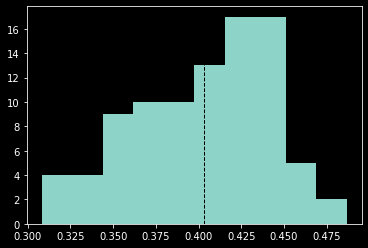

Boxplot


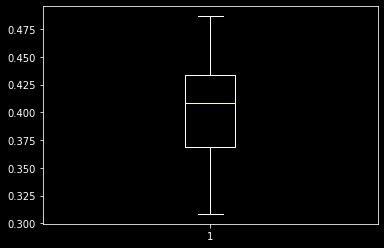

QQplot


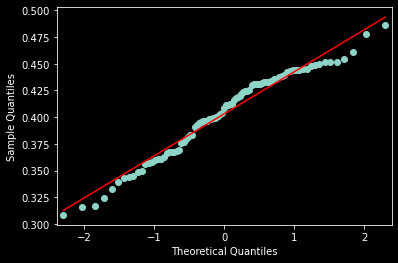

In [35]:
# Normality Test for 2019 Bounce Rate
normality_eda(Bounce_Rate_2019)

In [36]:
normality_test(Bounce_Rate_2019)


Shapiro Test Statistics=0.968, p=0.023
Variable 2 does not look Gaussian (reject H0)


In [37]:
means_test(Bounce_Rate_2019,Bounce_Rate_2018)

NameError: name 'means_test' is not defined